In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/Fuel_type_Registration_of_Vehicles.csv")

In [3]:
df.head()

,Month,CNG ONLY,DIESEL,DIESEL/HYBRID,DUAL DIESEL/CNG,ELECTRIC(BOV),ETHANOL,LPG ONLY,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,SOLAR,FUEL CELL HYDROGEN,LNG,METHANOL,DUAL DIESEL/LNG
0,Jan-14,2103,270915,3,0,232,0,188,10278,1347016,20623,0,0,6307,9,0,0,0,0
1,Feb-14,1607,219601,3,1,171,1,116,8884,1176669,15266,0,1,4803,17,0,0,0,0
2,Mar-14,2026,258723,3,1,220,1,106,11115,1329273,18800,0,0,5609,16,0,0,0,0
3,Apr-14,1718,222632,3,1,252,0,121,8522,1296500,19714,1,0,5600,19,0,0,0,0
4,May-14,1727,237336,6,0,186,2,103,9656,1408836,20626,0,1,6317,14,0,0,0,0


In [4]:
df.columns.tolist()

['Month',
 'CNG ONLY',
 'DIESEL',
 'DIESEL/HYBRID',
 'DUAL DIESEL/CNG',
 'ELECTRIC(BOV)',
 'ETHANOL',
 'LPG ONLY',
 'NOT APPLICABLE',
 'PETROL',
 'PETROL/CNG',
 'PETROL/ETHANOL',
 'PETROL/HYBRID',
 'PETROL/LPG',
 'SOLAR',
 'FUEL CELL HYDROGEN',
 'LNG',
 'METHANOL',
 'DUAL DIESEL/LNG']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month               115 non-null    object
 1   CNG ONLY            115 non-null    int64 
 2   DIESEL              115 non-null    int64 
 3   DIESEL/HYBRID       115 non-null    int64 
 4   DUAL DIESEL/CNG     115 non-null    int64 
 5   ELECTRIC(BOV)       115 non-null    int64 
 6   ETHANOL             115 non-null    int64 
 7   LPG ONLY            115 non-null    int64 
 8   NOT APPLICABLE      115 non-null    int64 
 9   PETROL              115 non-null    int64 
 10  PETROL/CNG          115 non-null    int64 
 11  PETROL/ETHANOL      115 non-null    int64 
 12  PETROL/HYBRID       115 non-null    int64 
 13  PETROL/LPG          115 non-null    int64 
 14  SOLAR               115 non-null    int64 
 15  FUEL CELL HYDROGEN  115 non-null    int64 
 16  LNG                 115 no

In [6]:
df.shape

(115, 19)

In [7]:
print(pd.isnull(df).sum())

Month                 0
CNG ONLY              0
DIESEL                0
DIESEL/HYBRID         0
DUAL DIESEL/CNG       0
ELECTRIC(BOV)         0
ETHANOL               0
LPG ONLY              0
NOT APPLICABLE        0
PETROL                0
PETROL/CNG            0
PETROL/ETHANOL        0
PETROL/HYBRID         0
PETROL/LPG            0
SOLAR                 0
FUEL CELL HYDROGEN    0
LNG                   0
METHANOL              0
DUAL DIESEL/LNG       0
dtype: int64


In [8]:
df["Month"]=pd.to_datetime(df["Month"], format='%b-%y')
df["Month"].head()

0   2014-01-01
1   2014-02-01
2   2014-03-01
3   2014-04-01
4   2014-05-01
Name: Month, dtype: datetime64[ns]

In [10]:
df['HYBRID COMBINED'] = df['PETROL/HYBRID'] + df['DIESEL/HYBRID']
df.drop(['PETROL/HYBRID', 'DIESEL/HYBRID'], axis=1, inplace=True)

In [11]:
df

,Month,CNG ONLY,DIESEL,DUAL DIESEL/CNG,ELECTRIC(BOV),ETHANOL,LPG ONLY,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/LPG,SOLAR,FUEL CELL HYDROGEN,LNG,METHANOL,DUAL DIESEL/LNG,HYBRID COMBINED
0,2014-01-01,2103,270915,0,232,0,188,10278,1347016,20623,0,6307,9,0,0,0,0,3
1,2014-02-01,1607,219601,1,171,1,116,8884,1176669,15266,0,4803,17,0,0,0,0,4
2,2014-03-01,2026,258723,1,220,1,106,11115,1329273,18800,0,5609,16,0,0,0,0,3
3,2014-04-01,1718,222632,1,252,0,121,8522,1296500,19714,1,5600,19,0,0,0,0,3
4,2014-05-01,1727,237336,0,186,2,103,9656,1408836,20626,0,6317,14,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2023-03-01,34392,239185,0,140895,0,1699,4847,1562953,32745,12776,658,0,0,23,0,0,38240
111,2023-04-01,29921,197337,0,111327,0,1545,4336,1323102,31801,18139,347,0,0,11,0,0,28058
112,2023-05-01,30945,207305,0,158336,0,1998,4280,1548095,37213,25678,208,0,0,22,0,0,26299
113,2023-06-01,34552,225327,0,102409,0,2167,4860,1410875,41391,31854,121,0,0,13,0,0,26529


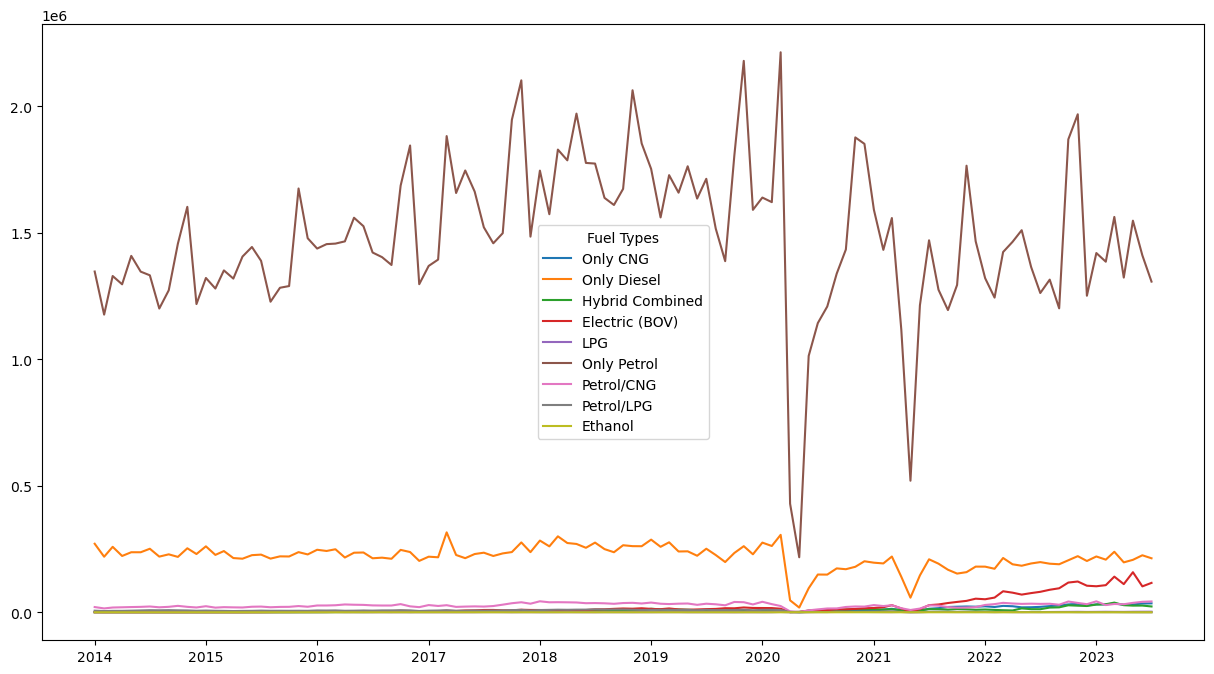

In [12]:
plt.figure(figsize=(15,8))

plt.plot(df["Month"],df["CNG ONLY"], label='Only CNG')
plt.plot(df["Month"],df['DIESEL'], label='Only Diesel')
plt.plot(df["Month"],df['HYBRID COMBINED'], label='Hybrid Combined')
plt.plot(df["Month"],df['ELECTRIC(BOV)'], label='Electric (BOV)')
plt.plot(df["Month"],df['LPG ONLY'], label='LPG')
plt.plot(df["Month"],df['PETROL'], label='Only Petrol')
plt.plot(df["Month"],df['PETROL/CNG'], label='Petrol/CNG')
plt.plot(df["Month"],df['PETROL/LPG'], label='Petrol/LPG')
plt.plot(df["Month"],df['ETHANOL'], label='Ethanol')

plt.legend(title="Fuel Types", loc="best")
plt.show()

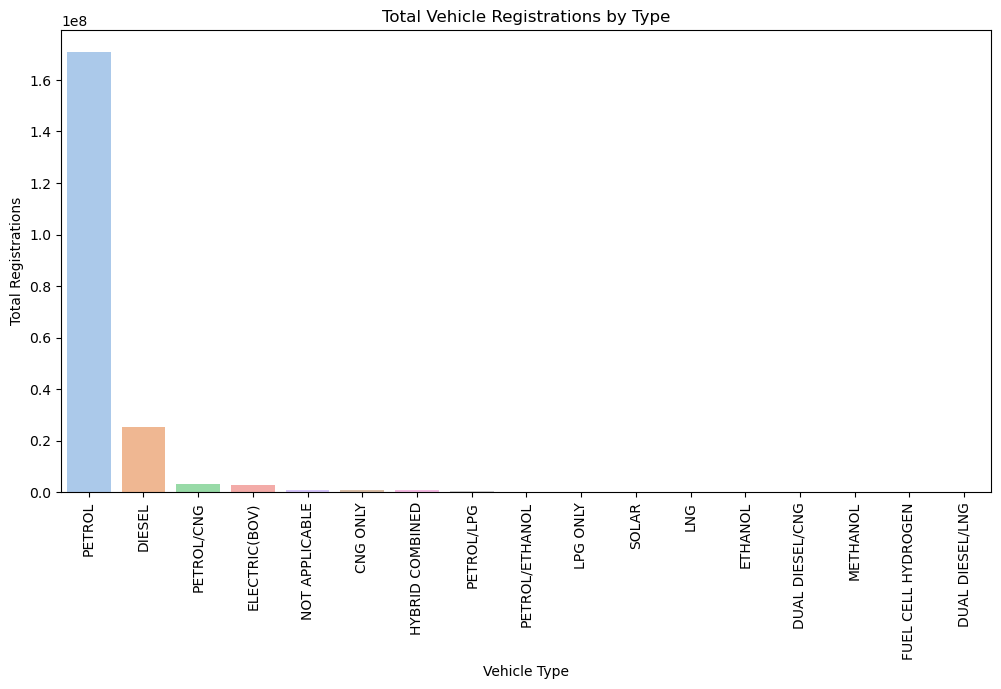

In [13]:
columnsInterest = df.columns

selectedColumns = df[columnsInterest]
selectedColumns = selectedColumns.drop('Month', axis=1, errors='ignore')
totalRegistration = selectedColumns.sum()

sortedColumns = totalRegistration.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sortedColumns.index, y=sortedColumns.values, palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('Vehicle Type')
plt.ylabel('Total Registrations')
plt.title('Total Vehicle Registrations by Type')
plt.show()

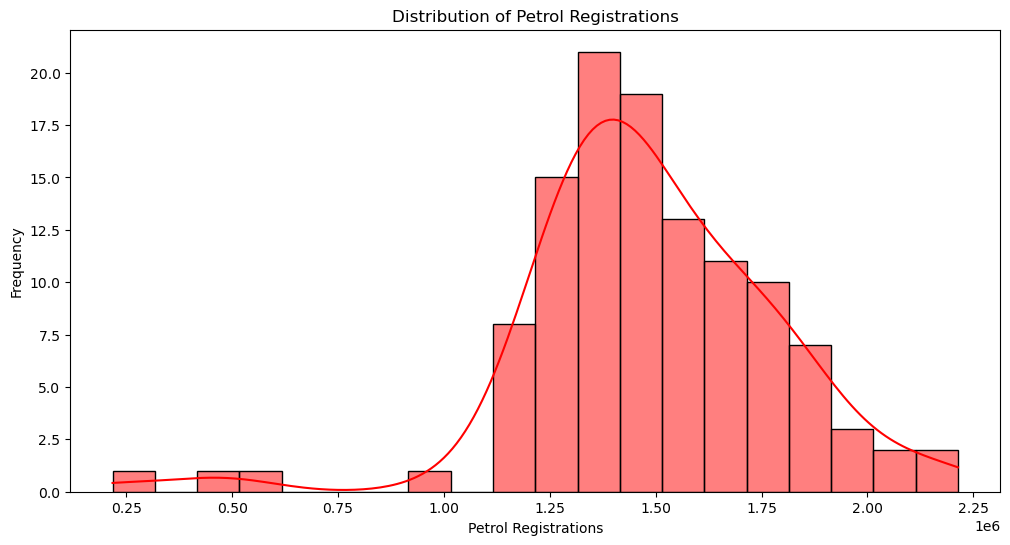

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(df['PETROL'], bins=20, kde=True, color='red')
plt.title('Distribution of Petrol Registrations')
plt.xlabel('Petrol Registrations')
plt.ylabel('Frequency')
plt.show()

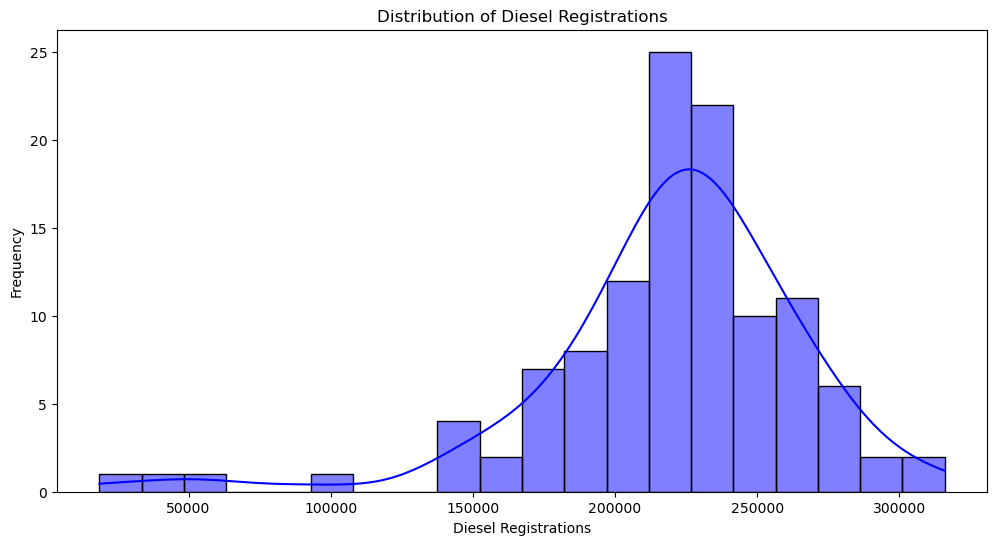

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(df['DIESEL'], bins=20, kde=True, color='blue')
plt.title('Distribution of Diesel Registrations')
plt.xlabel('Diesel Registrations')
plt.ylabel('Frequency')
plt.show()

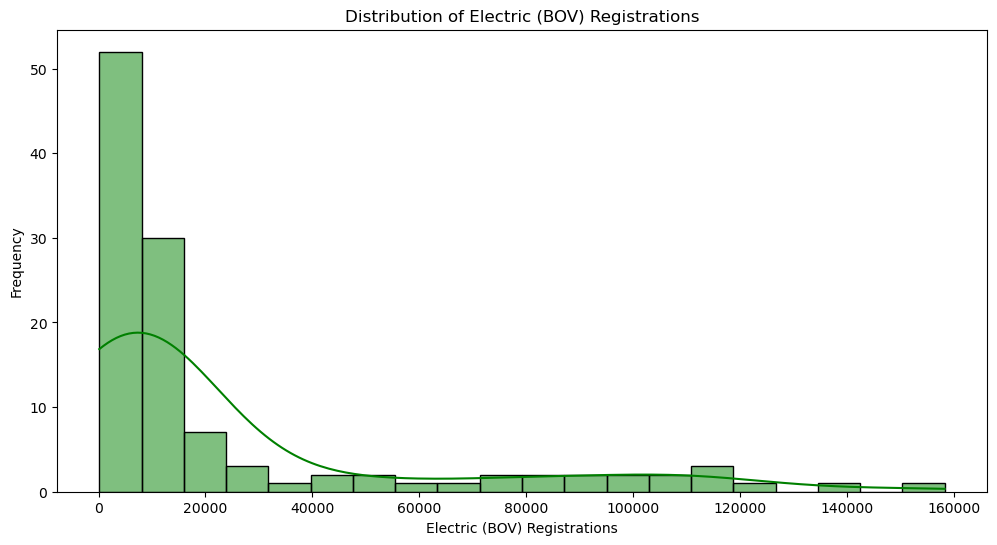

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(df['ELECTRIC(BOV)'], bins=20, kde=True, color='green')
plt.title('Distribution of Electric (BOV) Registrations')
plt.xlabel('Electric (BOV) Registrations')
plt.ylabel('Frequency')
plt.show()

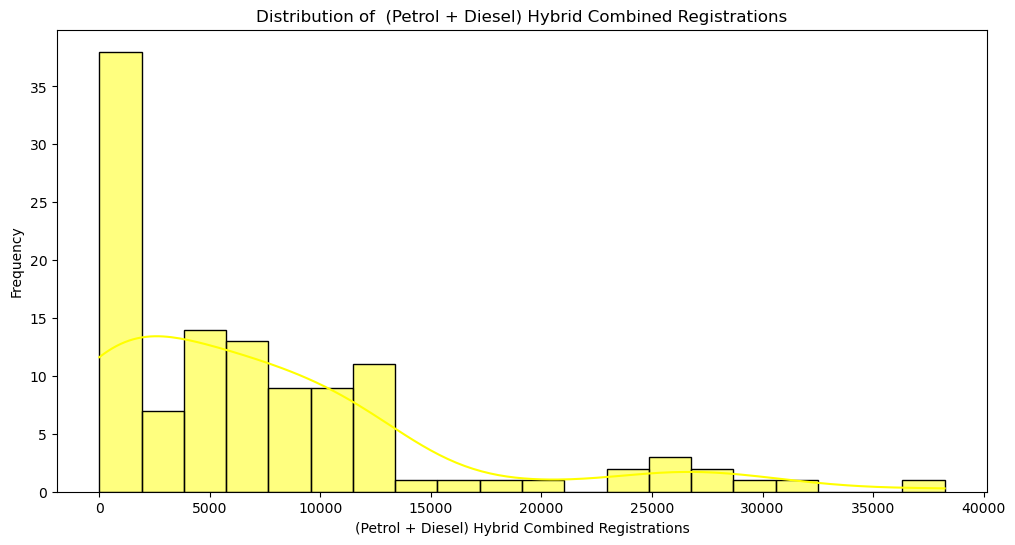

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(df['HYBRID COMBINED'], bins=20, kde=True, color='yellow')
plt.title('Distribution of  (Petrol + Diesel) Hybrid Combined Registrations')
plt.xlabel('(Petrol + Diesel) Hybrid Combined Registrations')
plt.ylabel('Frequency')
plt.show()

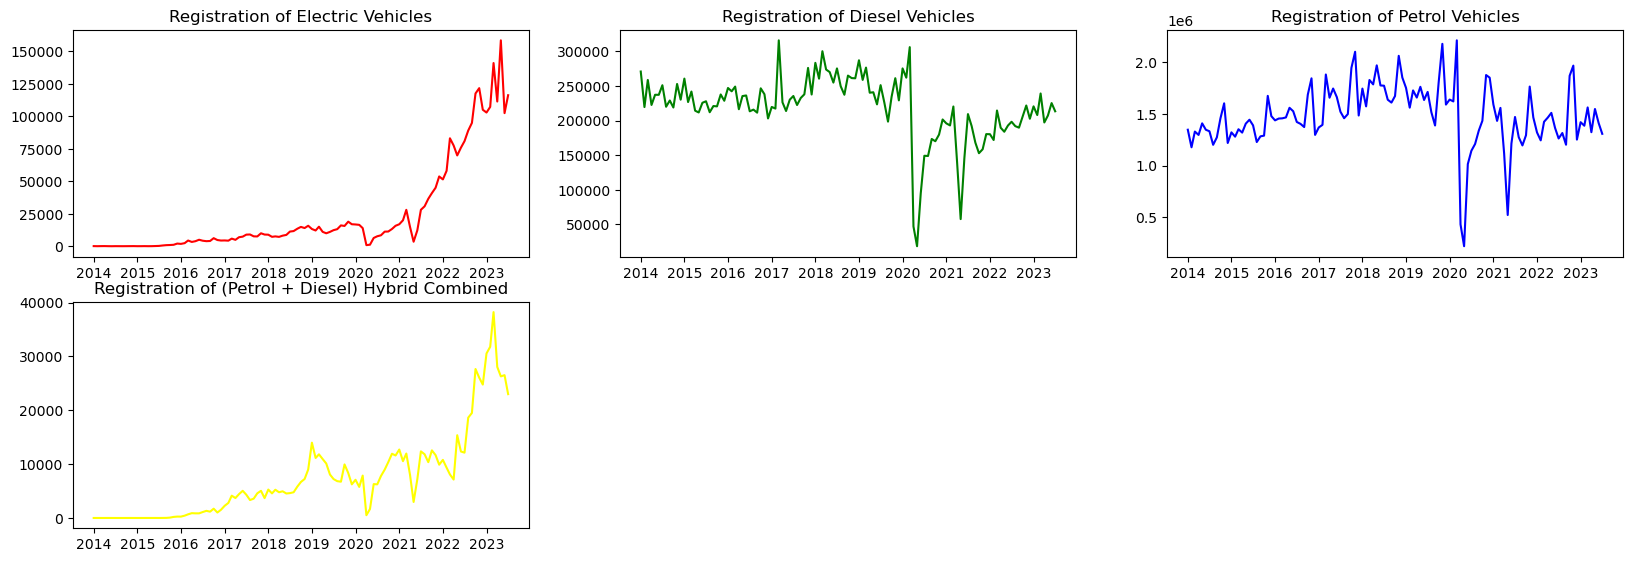

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
plt.plot(df['Month'],df['ELECTRIC(BOV)'], color = 'red')
plt.title('Registration of Electric Vehicles')
plt.subplot(3,3,2)
plt.plot(df['Month'],df['DIESEL'], color = 'green')
plt.title('Registration of Diesel Vehicles')
plt.subplot(3,3,3)
plt.plot(df['Month'],df['PETROL'], color = 'blue')
plt.title('Registration of Petrol Vehicles')
plt.subplot(3,3,4)
plt.plot(df['Month'], df['HYBRID COMBINED'], color = 'yellow')
plt.title('Registration of (Petrol + Diesel) Hybrid Combined')
plt.show()

In [23]:
finalColumns = ['Month', 'DIESEL', 'HYBRID COMBINED','ELECTRIC(BOV)','PETROL']
finalDatasetFuelType = df.loc[:,finalColumns]
finalDatasetFuelType

,Month,DIESEL,HYBRID COMBINED,ELECTRIC(BOV),PETROL
0,2014-01-01,270915,3,232,1347016
1,2014-02-01,219601,4,171,1176669
2,2014-03-01,258723,3,220,1329273
3,2014-04-01,222632,3,252,1296500
4,2014-05-01,237336,7,186,1408836
...,...,...,...,...,...
110,2023-03-01,239185,38240,140895,1562953
111,2023-04-01,197337,28058,111327,1323102
112,2023-05-01,207305,26299,158336,1548095
113,2023-06-01,225327,26529,102409,1410875


<Figure size 1000x800 with 0 Axes>

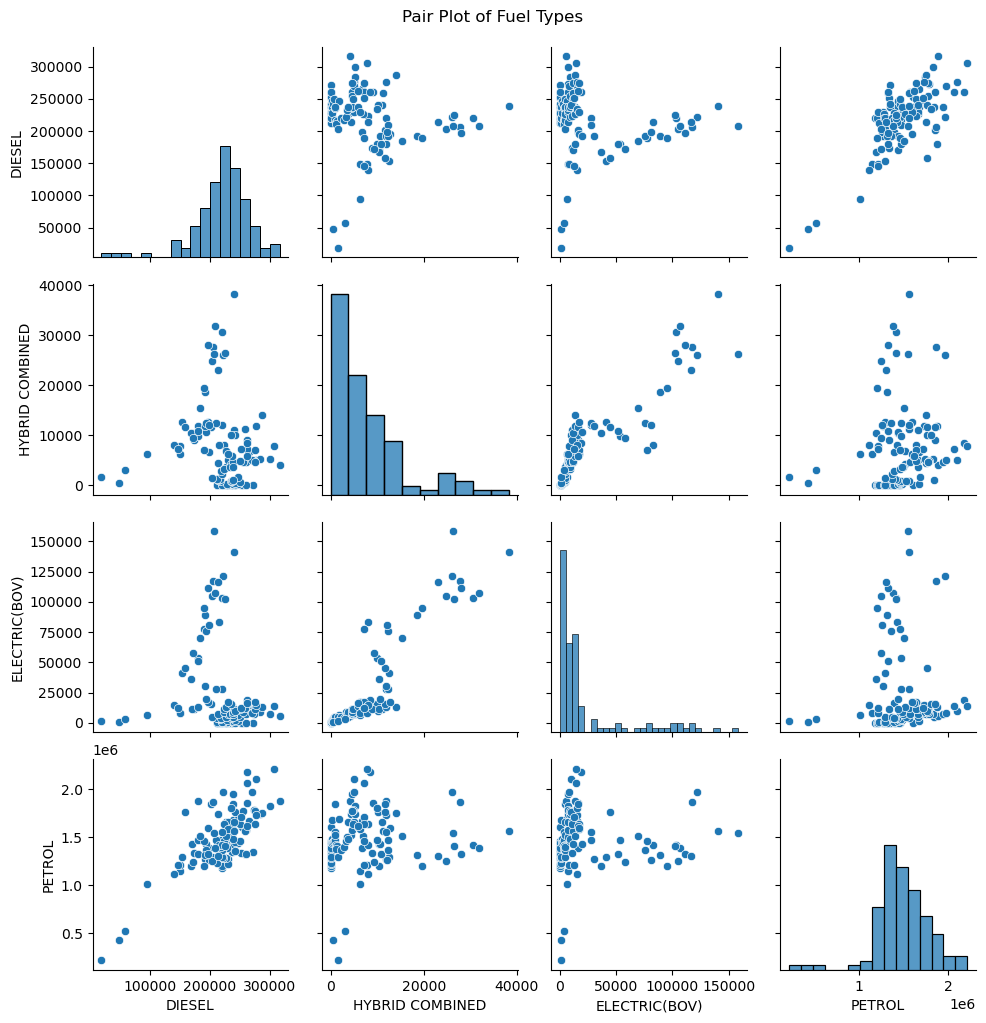

In [24]:
plt.figure(figsize=(10, 8))
sns.pairplot(finalDatasetFuelType)
plt.suptitle('Pair Plot of Fuel Types', y=1.02)
plt.show()

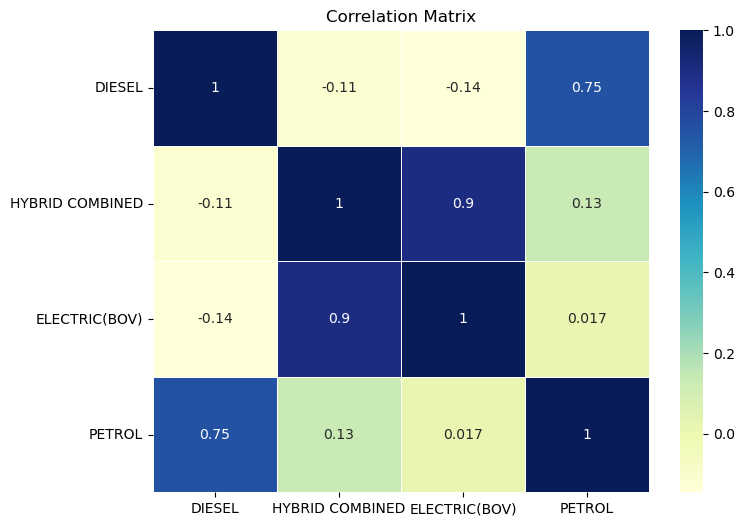

In [25]:
correlation_matrix = finalDatasetFuelType.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [26]:
finalDatasetFuelType['Year'] = finalDatasetFuelType['Month'].dt.year

selectedYears = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
filteredDatasetFuelType = finalDatasetFuelType[finalDatasetFuelType['Year'].isin(selectedYears)]
totalRegistrationsPerYear = filteredDatasetFuelType.groupby('Year')[['DIESEL', 'HYBRID COMBINED', 'ELECTRIC(BOV)', 'PETROL']].sum()

fuelTypePercentages = totalRegistrationsPerYear.divide(totalRegistrationsPerYear.sum(axis=1), axis=0) * 100

<Figure size 1000x600 with 0 Axes>

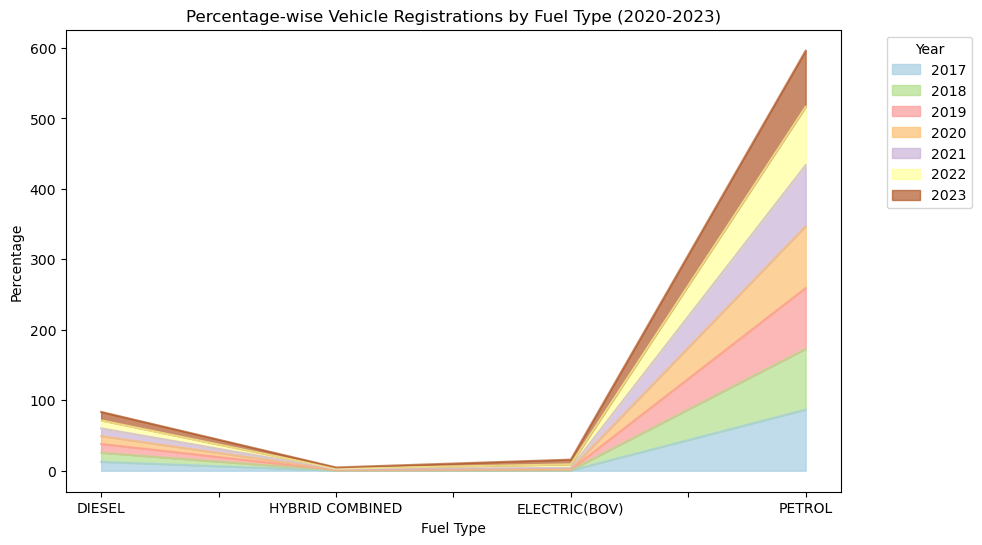

In [27]:
plt.figure(figsize=(10, 6))
fuelTypePercentages.T.plot(kind='area', colormap='Paired', alpha=0.7, figsize=(10, 6))
plt.title('Percentage-wise Vehicle Registrations by Fuel Type (2020-2023)')
plt.xlabel('Fuel Type')
plt.ylabel('Percentage')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

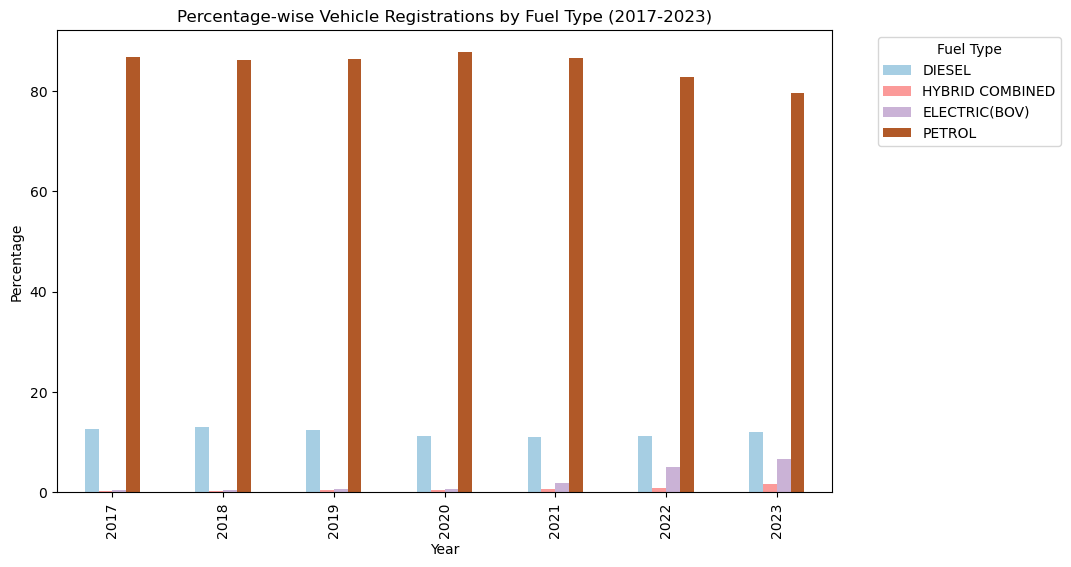

In [28]:
fuelTypePercentages.plot(kind='bar', colormap='Paired', figsize=(10, 6))
plt.title('Percentage-wise Vehicle Registrations by Fuel Type (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [29]:
numericalColumns = finalDatasetFuelType.select_dtypes(include=['int64', 'float64']).columns
datetimeColumns = finalDatasetFuelType['Month']
numericalData = finalDatasetFuelType[numericalColumns]

In [30]:
scaler = StandardScaler()
numericalScaledData = scaler.fit_transform(numericalData)
    
scaledData = pd.DataFrame(numericalScaledData, columns=numericalColumns)

In [31]:
pca = PCA(random_state = 42)
pca.fit(scaledData)

PCA(random_state=42)

In [32]:
dataPCA = pca.transform(scaledData)

In [33]:
dfPCA = pd.DataFrame(dataPCA, columns = [f'PC{x +1}' for x in range(len(scaledData.columns))])

In [34]:
dfPCA.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.987999,-0.123561,-1.052020,-0.245548,-0.040174
1,-1.700748,1.010833,-0.892833,0.123998,-0.162165
2,-1.924178,0.092010,-0.974634,-0.121975,-0.065859
3,-1.738075,0.683008,-0.712109,0.275596,-0.138102
4,-1.833817,0.207383,-0.645957,0.268703,-0.095725


In [35]:
PCAsummary = pd.DataFrame({'Standard Deviation':dfPCA.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

In [36]:
PCAsummary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.661434,0.547272,0.547272
PC2,1.325844,0.348516,0.895787
PC3,0.573775,0.065271,0.961058
PC4,0.341158,0.023075,0.984134
PC5,0.282892,0.015866,1.000000


In [37]:
factorLoadings = pd.DataFrame(pca.components_, columns = scaledData.columns, index = dfPCA.columns).T

In [38]:
factorLoadings.style.background_gradient(cmap = 'Blues')

,PC1,PC2,PC3,PC4,PC5
DIESEL,-0.230549,-0.660465,-0.411808,-0.577395,0.087537
HYBRID COMBINED,0.564441,-0.204135,-0.140009,-0.011392,-0.787403
ELECTRIC(BOV),0.555404,-0.138057,-0.509733,0.378399,0.519089
PETROL,-0.058510,-0.709256,0.520517,0.469873,0.042582
Year,0.562456,-0.003321,0.529194,-0.550017,0.317912


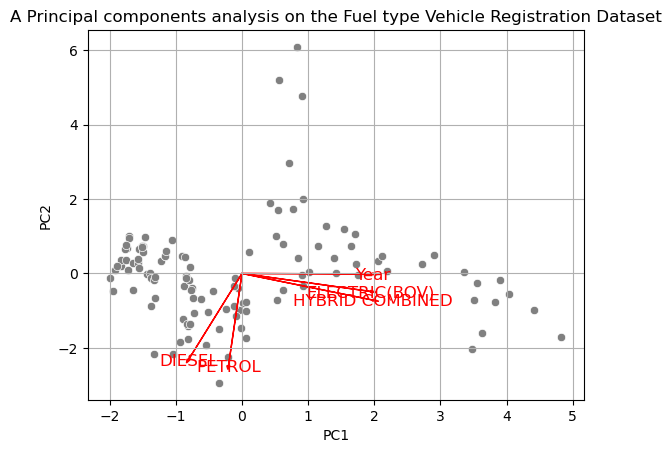

In [39]:
indexNames = factorLoadings.index

sns.scatterplot(dfPCA, x = 'PC1', y = 'PC2', color = 'grey')

for i in range(len(factorLoadings['PC1'])):
    plt.arrow(0, 0, factorLoadings['PC1'][i] * 3.5, factorLoadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text((factorLoadings['PC1'][i] * 3.5), factorLoadings['PC2'][i]* 3.5, indexNames[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis on the Fuel type Vehicle Registration Dataset')
plt.grid(True)
plt.show()

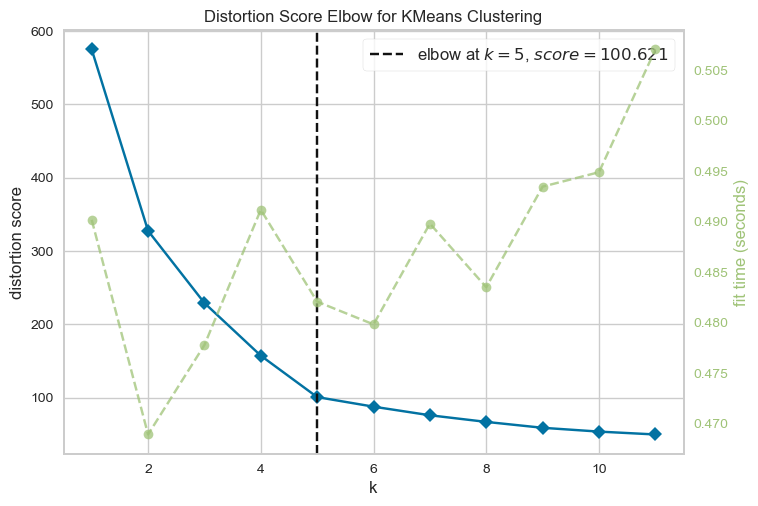

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12))
visualizer.fit(scaledData)

visualizer.show()

In [41]:
kmeans = KMeans(n_clusters=5)  
finalDatasetFuelType['Cluster'] = kmeans.fit_predict(scaledData)

print(finalDatasetFuelType['Cluster'].value_counts())

1    40
4    35
3    24
2    12
0     4
Name: Cluster, dtype: int64


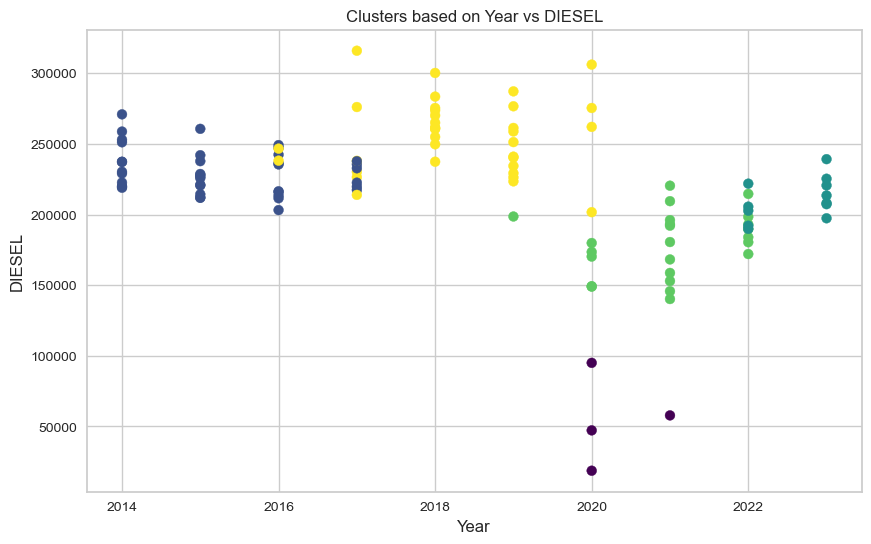

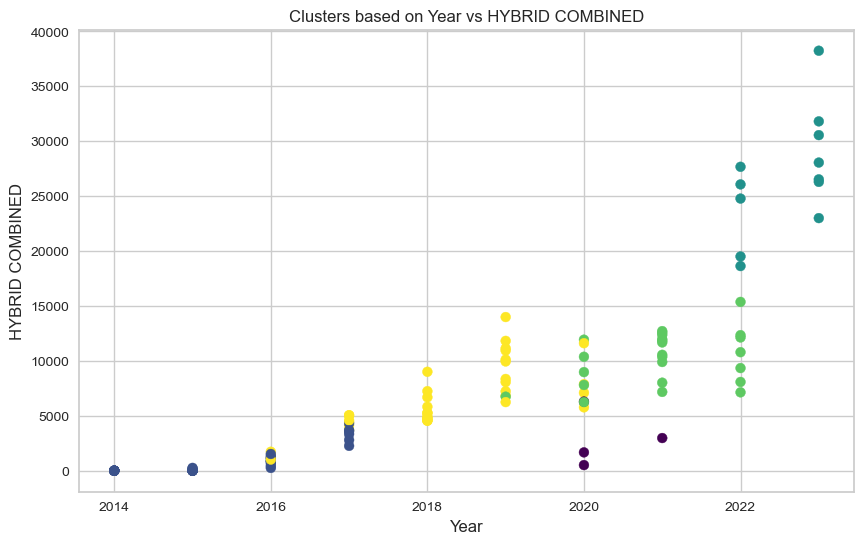

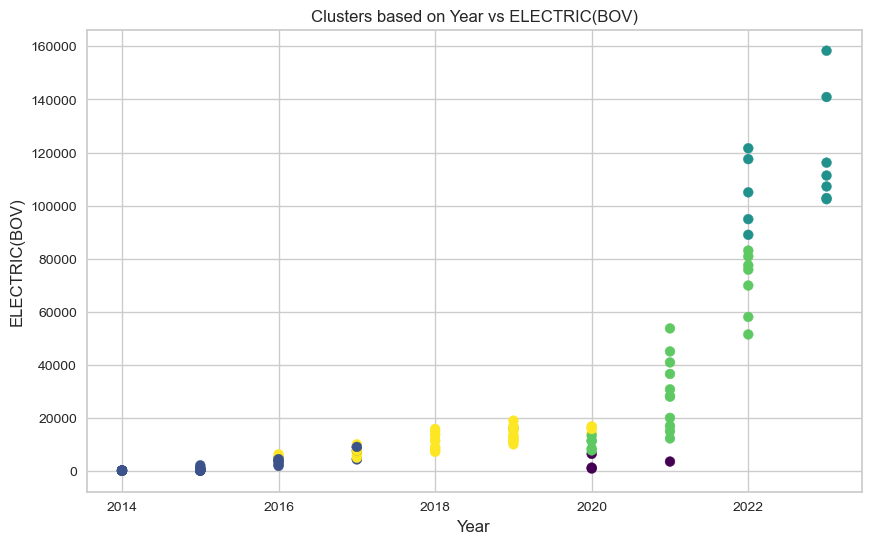

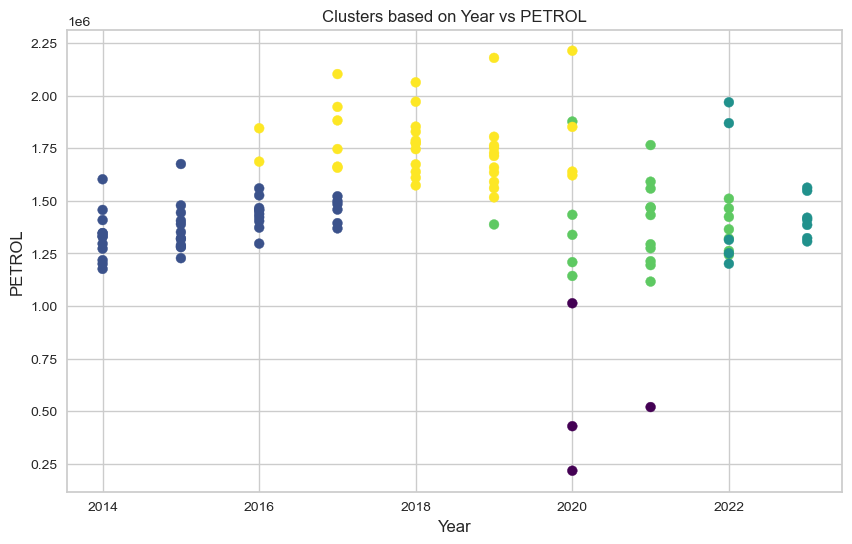

In [42]:
for feature in finalColumns[1:]: 
    plt.figure(figsize=(10, 6))
    plt.scatter(x='Year', y=feature, data=finalDatasetFuelType, c=finalDatasetFuelType['Cluster'], cmap='viridis', s=50)
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.title(f'Clusters based on Year vs {feature}')
    plt.show()

In [43]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(scaledData)
finalDatasetFuelType['Cluster Number'] = kmeans.labels_ 
print (kmeans.labels_) 
 
print (kmeans.inertia_) 

print(kmeans.n_iter_) 

print(kmeans.cluster_centers_)  

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 2 2 2 2 0 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2
 2 4 4 4 3 3 3 3 3 2 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1
 1 1 1 1]
100.62123634520665
7
[[ 0.24694002 -0.81966996 -0.60354216 -0.29431282 -1.09483083]
 [-0.19442227  2.426448    2.50937309 -0.07033171  1.54304354]
 [ 0.79212452 -0.06121791 -0.34879707  0.97353729  0.00691707]
 [-0.85583826  0.36673297  0.36794689 -0.31712072  0.97207823]
 [-3.54589718 -0.55777243 -0.58471837 -3.14464113  0.70162098]]


In [44]:
finalDatasetFuelType.head()

,Month,DIESEL,HYBRID COMBINED,ELECTRIC(BOV),PETROL,Year,Cluster,Cluster Number
0,2014-01-01,270915,3,232,1347016,2014,1,0
1,2014-02-01,219601,4,171,1176669,2014,1,0
2,2014-03-01,258723,3,220,1329273,2014,1,0
3,2014-04-01,222632,3,252,1296500,2014,1,0
4,2014-05-01,237336,7,186,1408836,2014,1,0


In [45]:
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 41, 2: 34, 3: 24, 4: 4, 1: 12})

In [46]:
kmeans.cluster_centers_[:,1]

array([-0.81966996,  2.426448  , -0.06121791,  0.36673297, -0.55777243])

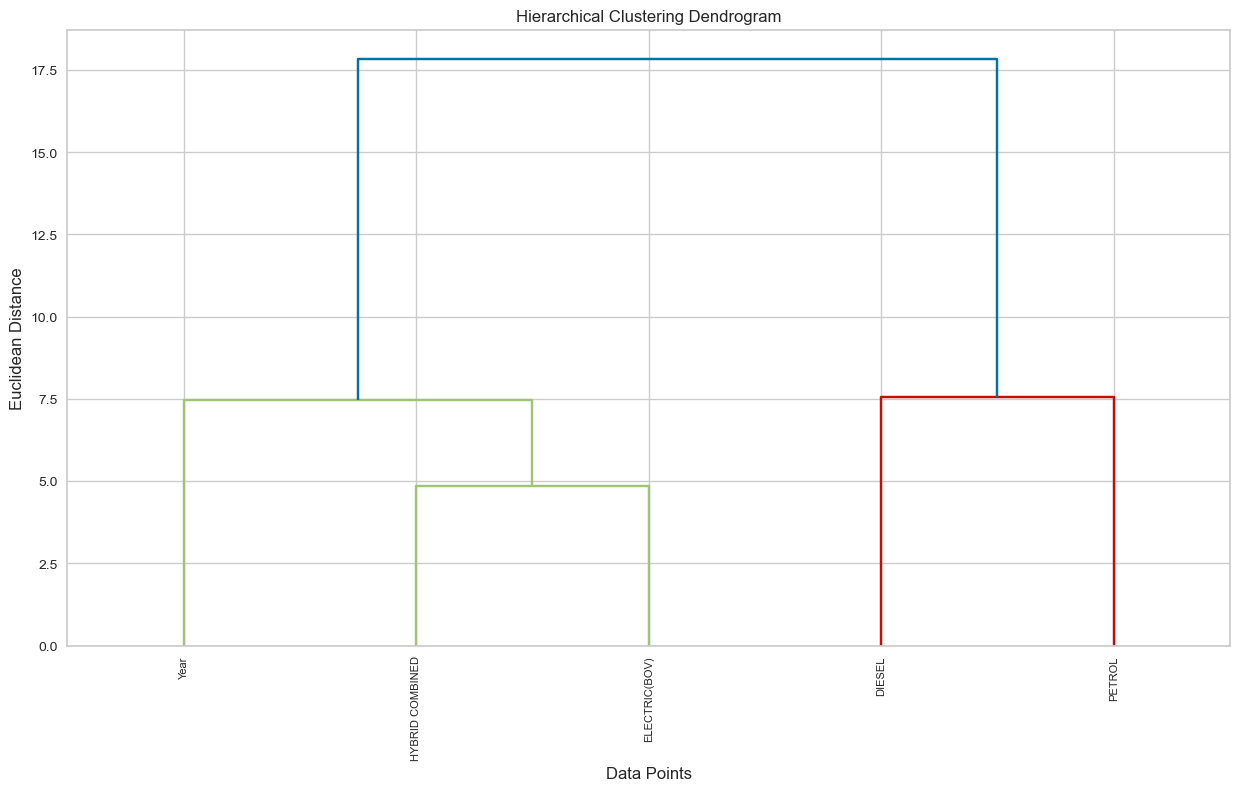

In [47]:
from scipy.cluster.hierarchy import linkage, dendrogram

transposed_data = scaledData.transpose()

MD_vclust = linkage(transposed_data, method='complete')

plt.figure(figsize=(15, 8))
dendrogram(MD_vclust, labels=transposed_data.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

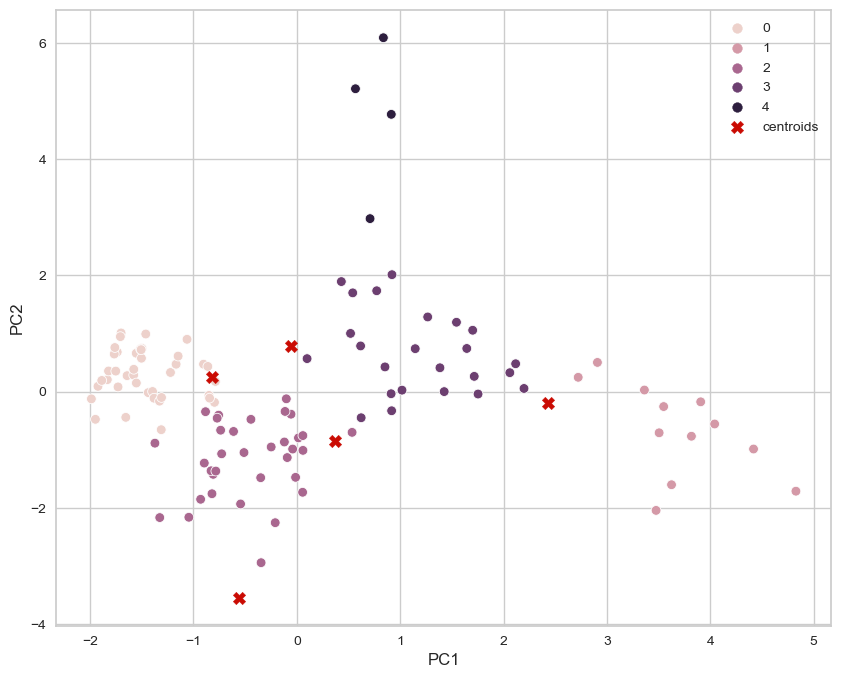

In [48]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=dfPCA, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()

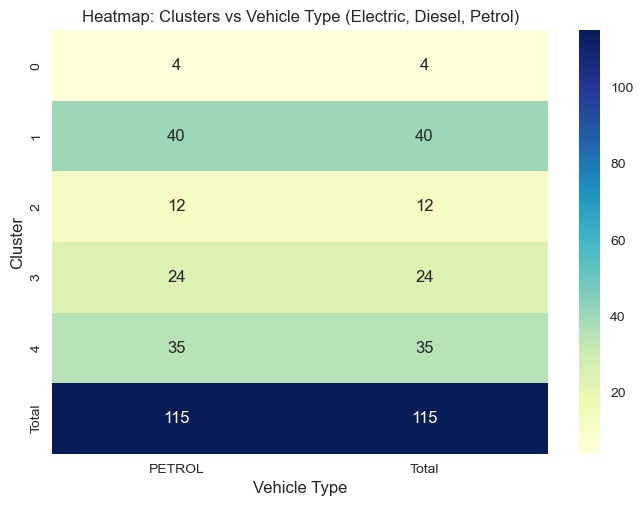

In [49]:
finalColumns = ['Month', 'DIESEL', 'HYBRID COMBINED', 'ELECTRIC(BOV)', 'PETROL', 'Year', 'Cluster', 'Cluster Number']

selectedFeatures = finalDatasetFuelType[finalColumns]
selectedFeatures['Vehicle Type'] = selectedFeatures[['ELECTRIC(BOV)', 'DIESEL', 'PETROL']].idxmax(axis=1).apply(lambda x: x.replace('/', '_'))
heatmapData = pd.crosstab(selectedFeatures['Cluster'], selectedFeatures['Vehicle Type'], margins=True, margins_name='Total')

sns.heatmap(heatmapData, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap: Clusters vs Vehicle Type (Electric, Diesel, Petrol)')
plt.show()

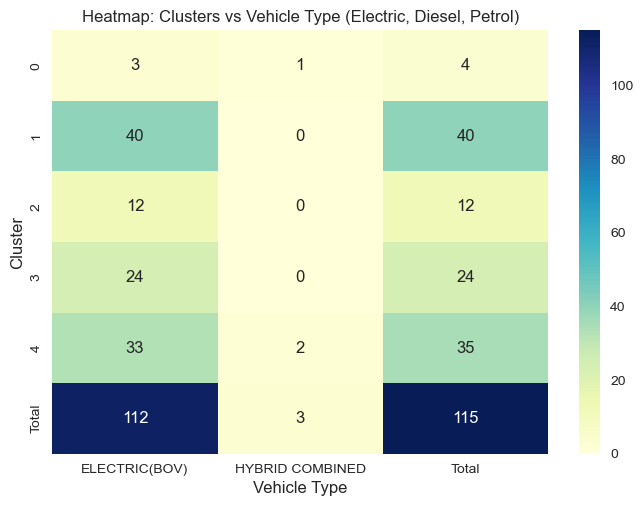

In [50]:
selectedFeatures['Vehicle Type'] = selectedFeatures[['ELECTRIC(BOV)', 'HYBRID COMBINED']].idxmax(axis=1).apply(lambda x: x.replace('/', '_'))
heatmapData = pd.crosstab(selectedFeatures['Cluster'], selectedFeatures['Vehicle Type'], margins=True, margins_name='Total')

sns.heatmap(heatmapData, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap: Clusters vs Vehicle Type (Electric, Diesel, Petrol)')
plt.show()

In [51]:
from sklearn.preprocessing import LabelEncoder
finalDatasetFuelType['ELECTRIC(BOV)']= LabelEncoder().fit_transform(finalDatasetFuelType['ELECTRIC(BOV)'])
electricBOV= finalDatasetFuelType.groupby('Cluster Number')['ELECTRIC(BOV)'].mean()
electricBOV= electricBOV.to_frame().reset_index()
electricBOV

,Cluster Number,ELECTRIC(BOV)
0,0,22.731707
1,1,108.500000
2,2,63.617647
3,3,85.041667
4,4,29.250000


In [52]:
from sklearn.preprocessing import LabelEncoder
finalDatasetFuelType['HYBRID COMBINED']= LabelEncoder().fit_transform(finalDatasetFuelType['HYBRID COMBINED'])
petrolHybrid= finalDatasetFuelType.groupby('Cluster Number')['HYBRID COMBINED'].mean()
petrolHybrid= petrolHybrid.to_frame().reset_index()
petrolHybrid

,Cluster Number,HYBRID COMBINED
0,0,11.609756
1,1,96.500000
2,2,52.647059
3,3,72.625000
4,4,29.250000


In [53]:
from sklearn.preprocessing import LabelEncoder
finalDatasetFuelType['HYBRID COMBINED']= LabelEncoder().fit_transform(finalDatasetFuelType['HYBRID COMBINED'])
hybridCombined= finalDatasetFuelType.groupby('Cluster Number')['HYBRID COMBINED'].mean()
hybridCombined= hybridCombined.to_frame().reset_index()
hybridCombined

,Cluster Number,HYBRID COMBINED
0,0,11.609756
1,1,96.500000
2,2,52.647059
3,3,72.625000
4,4,29.250000


In [54]:
segment = electricBOV.merge(hybridCombined, on = 'Cluster Number', how = 'left')
segment

,Cluster Number,ELECTRIC(BOV),HYBRID COMBINED
0,0,22.731707,11.609756
1,1,108.500000,96.500000
2,2,63.617647,52.647059
3,3,85.041667,72.625000
4,4,29.250000,29.250000


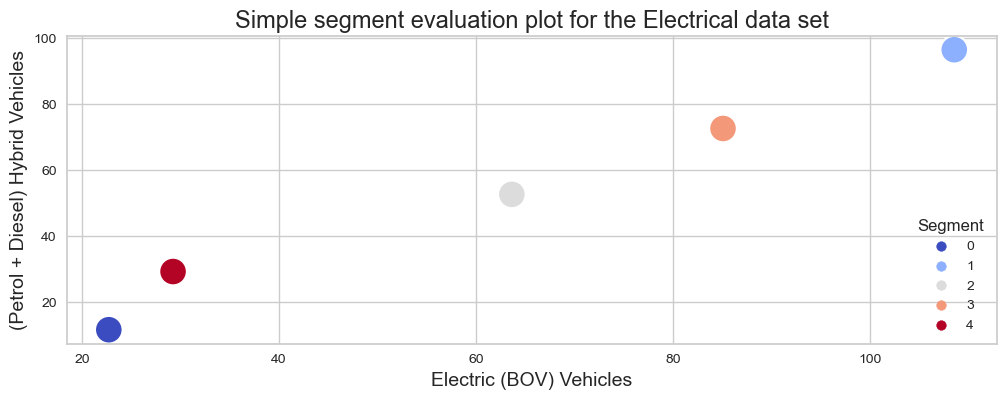

In [55]:
plt.figure(figsize = (12,4))
sns.scatterplot(x = "ELECTRIC(BOV)", y = "HYBRID COMBINED",data=segment,s=400, hue='Cluster Number', palette='coolwarm')
plt.title("Simple segment evaluation plot for the Electrical data set",
          fontsize = 17) 
plt.xlabel("Electric (BOV) Vehicles", fontsize = 14) 
plt.ylabel("(Petrol + Diesel) Hybrid Vehicles", fontsize = 14) 
plt.legend(title='Segment', loc='lower right')
plt.show()

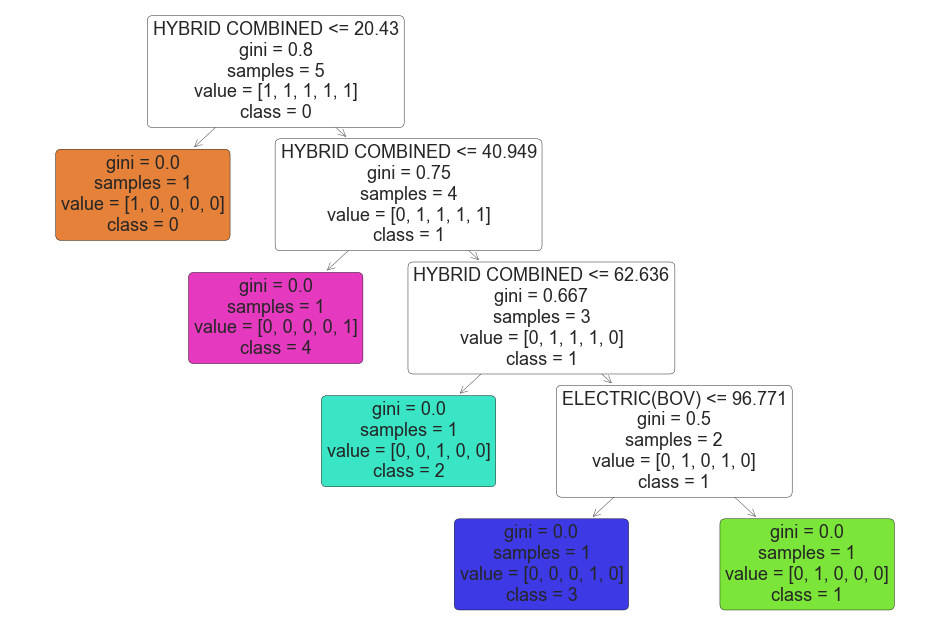

In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer


features = ['ELECTRIC(BOV)', 'HYBRID COMBINED']
target = 'Cluster Number'

X = segment[features]
y = segment[target]

tree = DecisionTreeClassifier()
tree.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=features, class_names=[str(i) for i in segment[target].unique()], filled=True, rounded=True)
plt.show()

In [59]:
df = pd.read_csv("C:/Users/HP/Downloads/Statewise_Charging_Stations_Sanctioned.csv")

In [60]:
df.head()

,State,Sanctioned State Wise Charging Stations
0,Andhra Pradesh,266
1,Assam,20
2,Bihar,37
3,Chandigarh,70
4,Chattisgarh,25


In [61]:
df.columns.tolist()

['State', 'Sanctioned State Wise Charging Stations']

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   State                                    26 non-null     object
 1   Sanctioned State Wise Charging Stations  26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 544.0+ bytes


In [63]:
df.shape

(26, 2)

In [64]:
print(pd.isnull(df).sum())

State                                      0
Sanctioned State Wise Charging Stations    0
dtype: int64


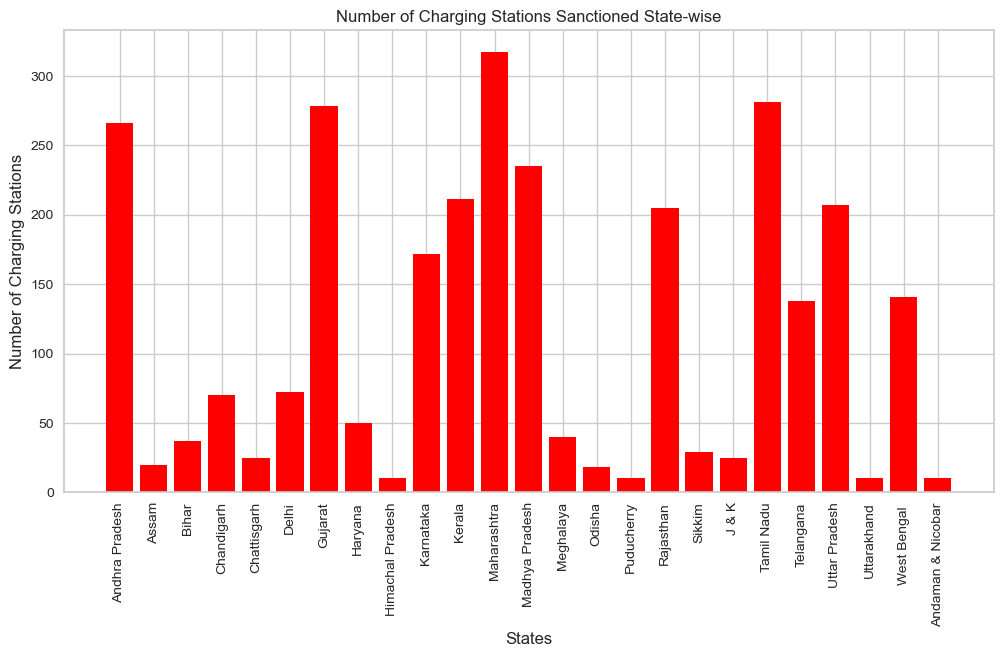

In [66]:
df = df[df['State'] != 'Total']

plt.figure(figsize=(12, 6))
plt.bar(df['State'], df['Sanctioned State Wise Charging Stations'], color='red')
plt.xlabel('States')
plt.ylabel('Number of Charging Stations')
plt.title('Number of Charging Stations Sanctioned State-wise')
plt.xticks(rotation=90)
plt.show()

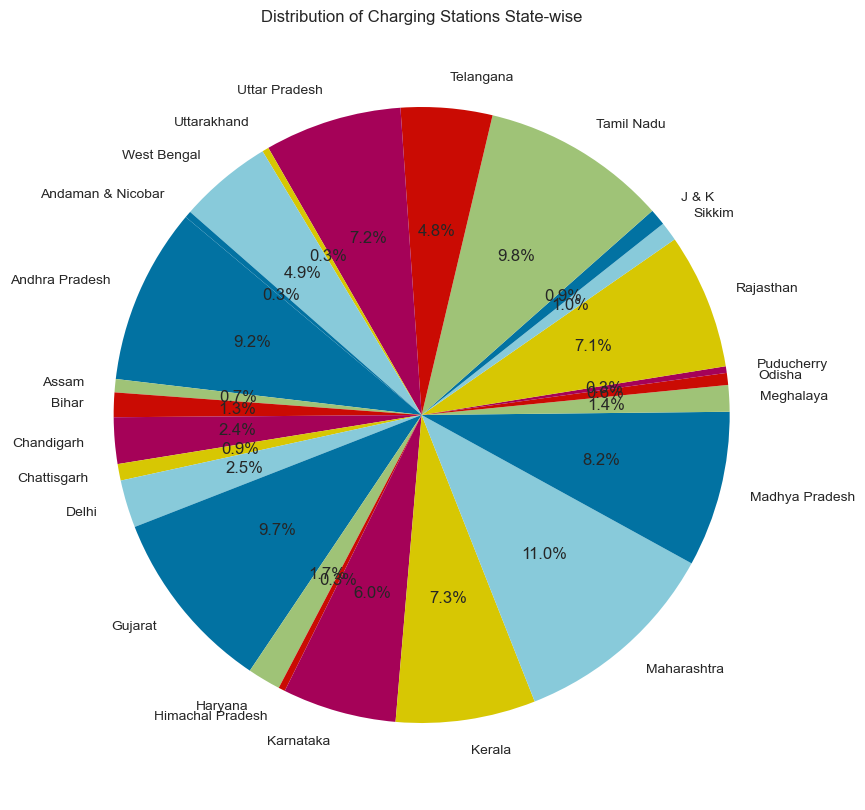

Total Charging Stations: 2877


In [67]:
plt.figure(figsize=(10, 10))
plt.pie(df['Sanctioned State Wise Charging Stations'], labels=df['State'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Charging Stations State-wise')
plt.show()

totalChargingStations = sum(df['Sanctioned State Wise Charging Stations'])
print(f'Total Charging Stations: {totalChargingStations}')

In [68]:
df = pd.read_csv("C:/Users/HP/Downloads/Citywise_Charging_Stations_Sanctioned.csv")

In [69]:
df.head()

,City,Sanctioned City Wise Charging Stations,EV Charging Stations Installed as on dated: 17-03-2022
0,Vijayawada,92,NaN
1,Vishakhapatnam,71,NaN
2,Tirupati,68,NaN
3,Kakinada,35,NaN
4,Jorhat,10,NaN


In [70]:
df.columns.tolist()

['City',
 'Sanctioned City Wise Charging Stations',
 'EV Charging Stations Installed as on dated: 17-03-2022']

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 3 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   City                                                    69 non-null     object 
 1   Sanctioned City Wise Charging Stations                  69 non-null     int64  
 2   EV Charging Stations Installed as on dated: 17-03-2022  5 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ KB


In [72]:
df.shape

(69, 3)

In [73]:
print(pd.isnull(df).sum())

City                                                       0
Sanctioned City Wise Charging Stations                     0
EV Charging Stations Installed as on dated: 17-03-2022    64
dtype: int64


In [74]:
df['EV Charging Stations Installed as on dated: 17-03-2022'].fillna(0, inplace=True)
print(pd.isnull(df).sum())

City                                                      0
Sanctioned City Wise Charging Stations                    0
EV Charging Stations Installed as on dated: 17-03-2022    0
dtype: int64


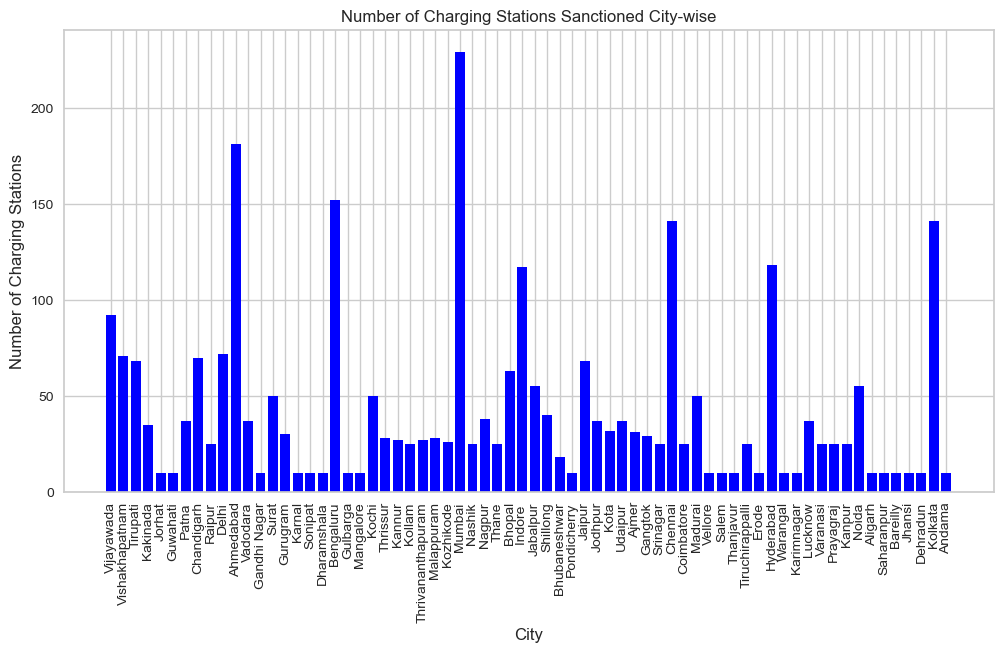

In [75]:
df = df[df['City'] != 'Total']

plt.figure(figsize=(12, 6))
plt.bar(df['City'], df['Sanctioned City Wise Charging Stations'], color='blue')
plt.xlabel('City')
plt.ylabel('Number of Charging Stations')
plt.title('Number of Charging Stations Sanctioned City-wise')
plt.xticks(rotation=90)
plt.show()

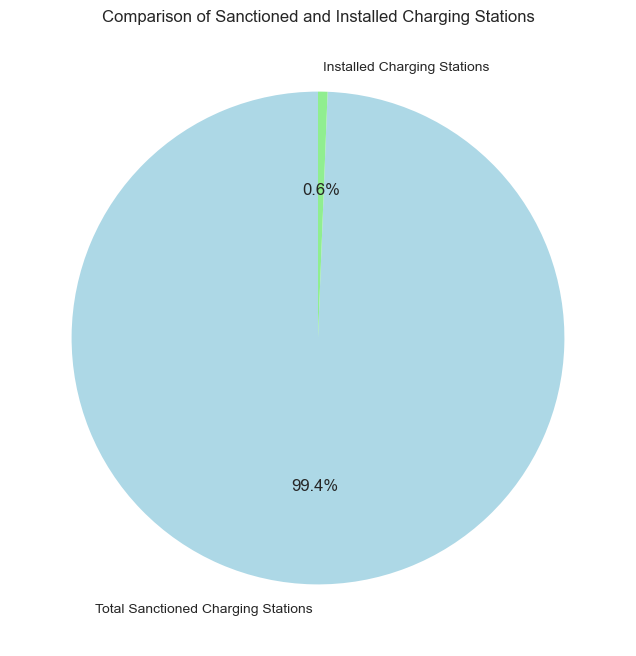

In [76]:
totalChargingStations = sum(df['Sanctioned City Wise Charging Stations'])
installedChargingStations = sum(df['EV Charging Stations Installed as on dated: 17-03-2022'])

labels = ['Total Sanctioned Charging Stations', 'Installed Charging Stations']
sizes = [totalChargingStations, installedChargingStations]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Comparison of Sanctioned and Installed Charging Stations')
plt.show()

In [77]:
df = pd.read_csv("C:/Users/HP/Downloads/Expressways_Highways_Charging_Stations.csv", encoding='cp1252')

In [78]:
df.head()

,Category,Expressways/Highways,EV Charging Stations Sanctioned
0,Expressways,Mumbai - Pune,10
1,Expressways,Ahmadabad - Vadodara,10
2,Expressways,Delhi Agra Yamuna,20
3,Expressways,Bengaluru Mysore,14
4,Expressways,Bangaluru-Chennai,30


In [79]:
df.columns.tolist()

['Category', 'Expressways/Highways', 'EV Charging Stations Sanctioned']

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Category                         26 non-null     object
 1   Expressways/Highways             26 non-null     object
 2   EV Charging Stations Sanctioned  26 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 752.0+ bytes


In [81]:
df.shape

(26, 3)

In [82]:
print(pd.isnull(df).sum())

Category                           0
Expressways/Highways               0
EV Charging Stations Sanctioned    0
dtype: int64


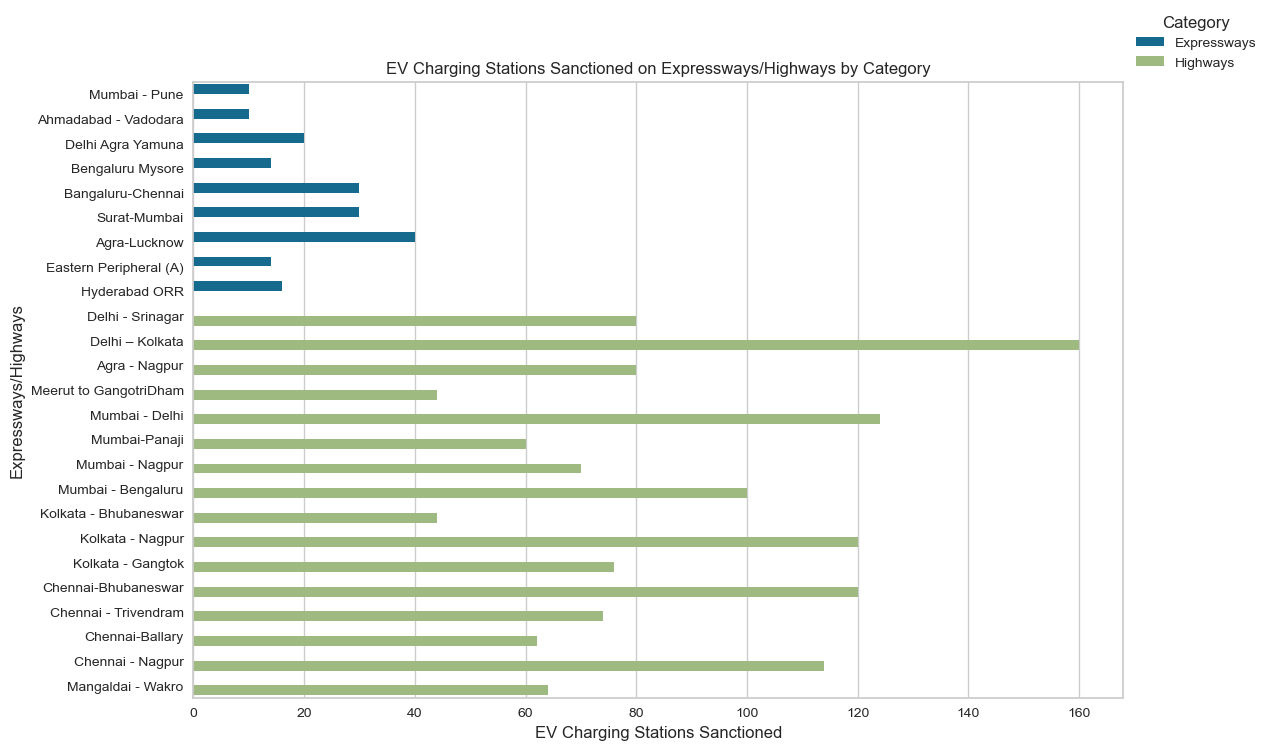

Total Charging Stations: 1576


In [83]:
df = df[df['Category'] != 'Total']

plt.figure(figsize=(12, 8))
sns.barplot(x=df['EV Charging Stations Sanctioned'], y=df['Expressways/Highways'], hue=df['Category'], orient='h')
plt.xlabel('EV Charging Stations Sanctioned')
plt.ylabel('Expressways/Highways')
plt.title('EV Charging Stations Sanctioned on Expressways/Highways by Category')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.show()

totalChargingStations = sum(df['EV Charging Stations Sanctioned'])
print(f'Total Charging Stations: {totalChargingStations}')